#### [개발 주제 : 길이에 따른 생선 무게 예측 모델 ]
- 데이터셋 : fish.csv
    - 피처/특성/데이터 : 길이 length 
    - 타겟/정답/레이블 : 무게 weight
-  합습종류 : 지도학습 - 회귀


[1] 모듈로딩 및 데이터 준비<hr>


In [63]:
## 1-1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
                            ## ML 알고리즘
from sklearn.metrics import mean_squared_error, mean_absolute_error
                            ## 성능평가 모듈
from sklearn.model_selection import train_test_split
                            ## 데이터셋 분리 관련 모듈듈

In [64]:
## 데이터준비
## 농ㅇ어의 무게와 길이
data_file = '../data/fish.csv'
fishDF = pd.DataFrame(pd.read_csv(data_file, header= None, skipfooter=31, skiprows=73, usecols=[1,2], engine='python'))
fishDF

,1,2
0,5.9,8.4
1,32.0,13.7
2,40.0,15.0
3,51.5,16.2
4,70.0,17.4
5,100.0,18.0
6,78.0,18.7
7,80.0,19.0
8,85.0,19.6
9,85.0,20.0


In [65]:
weight = fishDF[1]
length = fishDF[[2]]


[2] 데이터분석 -탐색적 분석

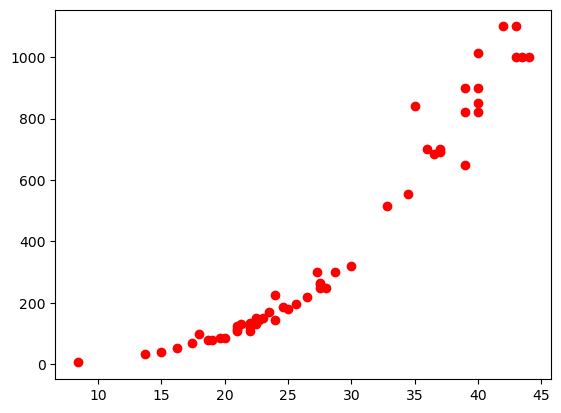

In [66]:
## 무게와 길이의 분포
plt.plot(length, weight,'or')
plt.show()

- 길이와 무게는 선형의 분포
- 길이에 따른 무게를 예측하기 위한 알고리즘으로 선형 모델 선정
- 학습 알고리즘 => LinearRegression으로 진행

[3] 학습 진행 <hr>
- 학습 종류 : 지도학습 => 데이터 + 타겟(정답, 레이블) / 회귀Regression(수치 예측)
- 학습 알고리즘: 데이터 분포가 선형을 띄고 있어서 선형회귀로 진행

- 3-1 데이터 셋 준비 => 학습용, 검증용, 테스트용
- 학 습 용 : 모델 학습 즉, 규칙과 패턴 찾기 위해 사용되는 데이터셋
- 검 증 용 : 모델 학습 진행이 제대로 되고 있는지 확인용 데이터셋
- 테스트용 : 학습 완료 후 검사용 데이터셋

- 전체 데이터셋 => 학습용 : 테스트용 = 70:30 또는 80:20

In [98]:
featureDF = length
targetSR = weight
print(f"featureDF => {featureDF.ndim}D, targetSr => {targetSR.ndim}D")

featureDF => 2D, targetSr => 1D


In [99]:
## 학습용 : 테스트용 = 7:3
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    test_size =0.3,
                                                    random_state=10)
print(f"X_train => {X_train.shape}, X_test => {X_test.shape}")
print(f"y_train => {y_train.shape}, y_test => {y_test.shape}")

X_train => (39, 1), X_test => (17, 1)
y_train => (39,), y_test => (17,)


In [100]:
## 학습용 : 검증용 = 8:2
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                    y_train,
                                                    test_size =0.2,
                                                    random_state=10)

print(f"X_train => {X_train.shape}, X_test => {X_test.shape}, X_val => {X_val.shape}")
print(f"y_train => {y_train.shape}, y_test => {y_test.shape}, y_val => {y_val.shape}")


X_train => (31, 1), X_test => (17, 1), X_val => (8, 1)
y_train => (31,), y_test => (17,), y_val => (8,)


[3-2] 학습진행 => 알고리즘 객체 생성

In [101]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [102]:
print(f"lr.coef_ {lr.coef_}")
print(f"lr.intercept_ {lr.intercept_}")
print(f"X_train = {lr.coef_[0]}*y_train + {lr.intercept_}")

lr.coef_ [36.16799332]
lr.intercept_ -624.9817944512461
X_train = 36.1679933176554*y_train + -624.9817944512461


[4] 학습 평가 <hr>
- 모델 성능 평가 : 얼마나 적합한 모델인가 평가
- 손실 계산 : 잔차/오차 발생정도

In [103]:
## [4-1] 모델 성능 평가 ==> 검증데이터
## 결과값 : 0.0 ~ 1.0
## 결과분석 : 1.0에 가까울수록 성능 좋은 모델
lr.score(X_val, y_val)

0.9062891610089505

In [104]:
## 4-2 손실 계산 ==> 검증 데이터
## - 결과범위 : 0 ~ 무한대
## - 결과분석: 0에 가까울수록 좋은 모델

## - 모델이 결정한 선형식기반 결과 예측
pre_y = lr.predict(X_val)

# 모델 예측값과 정답의 차이계산
mse = mean_squared_error(y_val, pre_y)
#오차평균

mae = mean_absolute_error(y_val,pre_y)
print(f"mse => {mse}, mae => {mae}")

mse => 16438.567954131915, mae => 111.86542723055426


[5] 예측 서비스 <hr>
- 웹 또는 앱에 포함된 모델에서 예측 서비스 진행
- 예측 메서드 : 알고리즘객체변수명.predict(2D_data) ==> 1D 예측갑 반환
    ** 전제조건  >>> 학습 시 진행된 데이터 전처리괒어을 거친 2D_data 를 전달해야함

In [106]:
pre_weight = lr.predict(X_test)

print(f" 당신의 점수는 {pre_weight}입니다 ")

 당신의 점수는 [362.40442312 -39.06030271 369.63802178 279.21803849 196.03165386
 170.71405854 785.56994494 -82.46189469 224.96604851 264.75084116
 387.72201844 561.32838637 188.7980552  413.03961377  62.21007858
  51.35968059 713.2339583 ]입니다 
